# Limitations of the entropy measure in n-gram language modelling (CLIN32)

### by Michael Bauwens (UCLL Research & Expertise)

This demo accompanies the poster presentation "Limitations of the entropy measure in n-gram language modelling". It provides the functionality to:
- import data (default: Jane Austen's "Emma")
- train a trigram language model on this dataset
- compute the probabilities of every sentence in the dataset
- score every sentence with a variety of entropy measures
- explore the correlations between entropy measures
- retrieve the most probable sentences (low entropy) based on every measure

## Import required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from tools import *
from nltk import download
from nltk.corpus import gutenberg

## Import the data

As toy example, we'll use Jane Austen's "Emma" (provided by the Gutenberg project via NLTK).

In [2]:
download('gutenberg')
data = [[w.lower() for w in s] for s in gutenberg.sents('austen-emma.txt')]

[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/michaelb/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


If you want to try this notebook with your own dataset, you can provide the text files. The function `import_data` _should_ transform the data into the correct format for the language modelling (a list of sentences, each consisting of lists of tokenised words). Currently the function is configured to support Dutch and English via the `lang` parameter. Should you require a different language, you can adapt the function (for language supported in spaCy v3, see [spacy.io/usage/models](https://spacy.io/usage/models)).

In [3]:
# data = import_data("/path/to/directory/", lang="ens")

## Train the language model

We'll use a trigram statistical language model, using a vocabulary with cutoff 2. We're using the standard language model and not a model with any smoothing (e.g. Kneser-Ney Interpolated smoothing) because we'll just evaluate the probability of sentences within the corpus *itself*.

In [4]:
lm = train_lm(data, cutoff=2)

With cutoff 2, the amount of <UNK> tokens is 2888.


## Compute probabilities for every sentence

For every sentence we'll compute the raw probabilities and store them in a dictionary together with the string version of the sentence and a list of the trigrams in the sentence. Additionally, we'll create a frequency distribution of the trigrams in the dataset, which we'll need for the frequency weighting later on. 

In [5]:
fdist, sent_dict = score_sentences(data, lm)

You can explore the sentence probabilities using the `get_random_sample(sent_dict)` function.

In [6]:
get_random_sample_prob(sent_dict)

Random sample of a sentence with its probabilities

Sentence (#4107): he continued ; " every day more precious and more delightful than the day before !-- every day making me less fit to bear any other place .

Trigrams: [('<s>', '<s>', 'he'), ('<s>', 'he', 'continued'), ('he', 'continued', ';'), ('continued', ';', '"'), (';', '"', 'every'), ('"', 'every', 'day'), ('every', 'day', 'more'), ('day', 'more', 'precious'), ('more', 'precious', 'and'), ('precious', 'and', 'more'), ('and', 'more', 'delightful'), ('more', 'delightful', 'than'), ('delightful', 'than', 'the'), ('than', 'the', 'day'), ('the', 'day', 'before'), ('day', 'before', '!--'), ('before', '!--', 'every'), ('!--', 'every', 'day'), ('every', 'day', 'making'), ('day', 'making', 'me'), ('making', 'me', 'less'), ('me', 'less', 'fit'), ('less', 'fit', 'to'), ('fit', 'to', 'bear'), ('to', 'bear', 'any'), ('bear', 'any', 'other'), ('any', 'other', 'place'), ('other', 'place', '.'), ('place', '.', '</s>'), ('.', '</s>', '</s>')]



## Calculate entropy measures

For each sentence, we add the different entropy measures to the dictionary as well as some additional information (sentence length, percentage of trigrams with low relative frequency, and percentage of trigrams with perfect probability).

Entropy measures:
- Shannon entropy
- Length normalised Shannon entropy
- Shannon entropy via Shannon-McMillan-Breiman theorem
- Relative frequency weighted Shannon entropy
- Length normalised relative frequency weighted Shannon entropy

The dictionary is then transformed into a Pandas dataframe.

In [7]:
for sent_id in sent_dict:
    sent_dict[sent_id] = entropy_measures(sent_dict[sent_id], fdist, lm)
    
df = pd.DataFrame.from_dict(sent_dict, orient='index')

Check out some random samples.

In [8]:
get_random_sample_ent(df)

Sentence: "" we cannot suppose that she has any great enjoyment at the vicarage , my dear emma -- but it is better than being always at home ."
Sentence length (in trigrams): 30
Percentage of low trigram relfreq (count<4): 67%
Percentage of perfect probability: 13%
Shannon entropy: 9.5301
Shannon entropy (length normalised): 0.3177
Shannon-McMillan-Breiman entropy (~ length normalised): 2.5824
Shannon entropy (relative frequency weighted): 0.151
Shannon entropy (length normalised + relfreq weighted): 0.005



Now we'll investigate how the different measures relate to one another in terms of correlation.

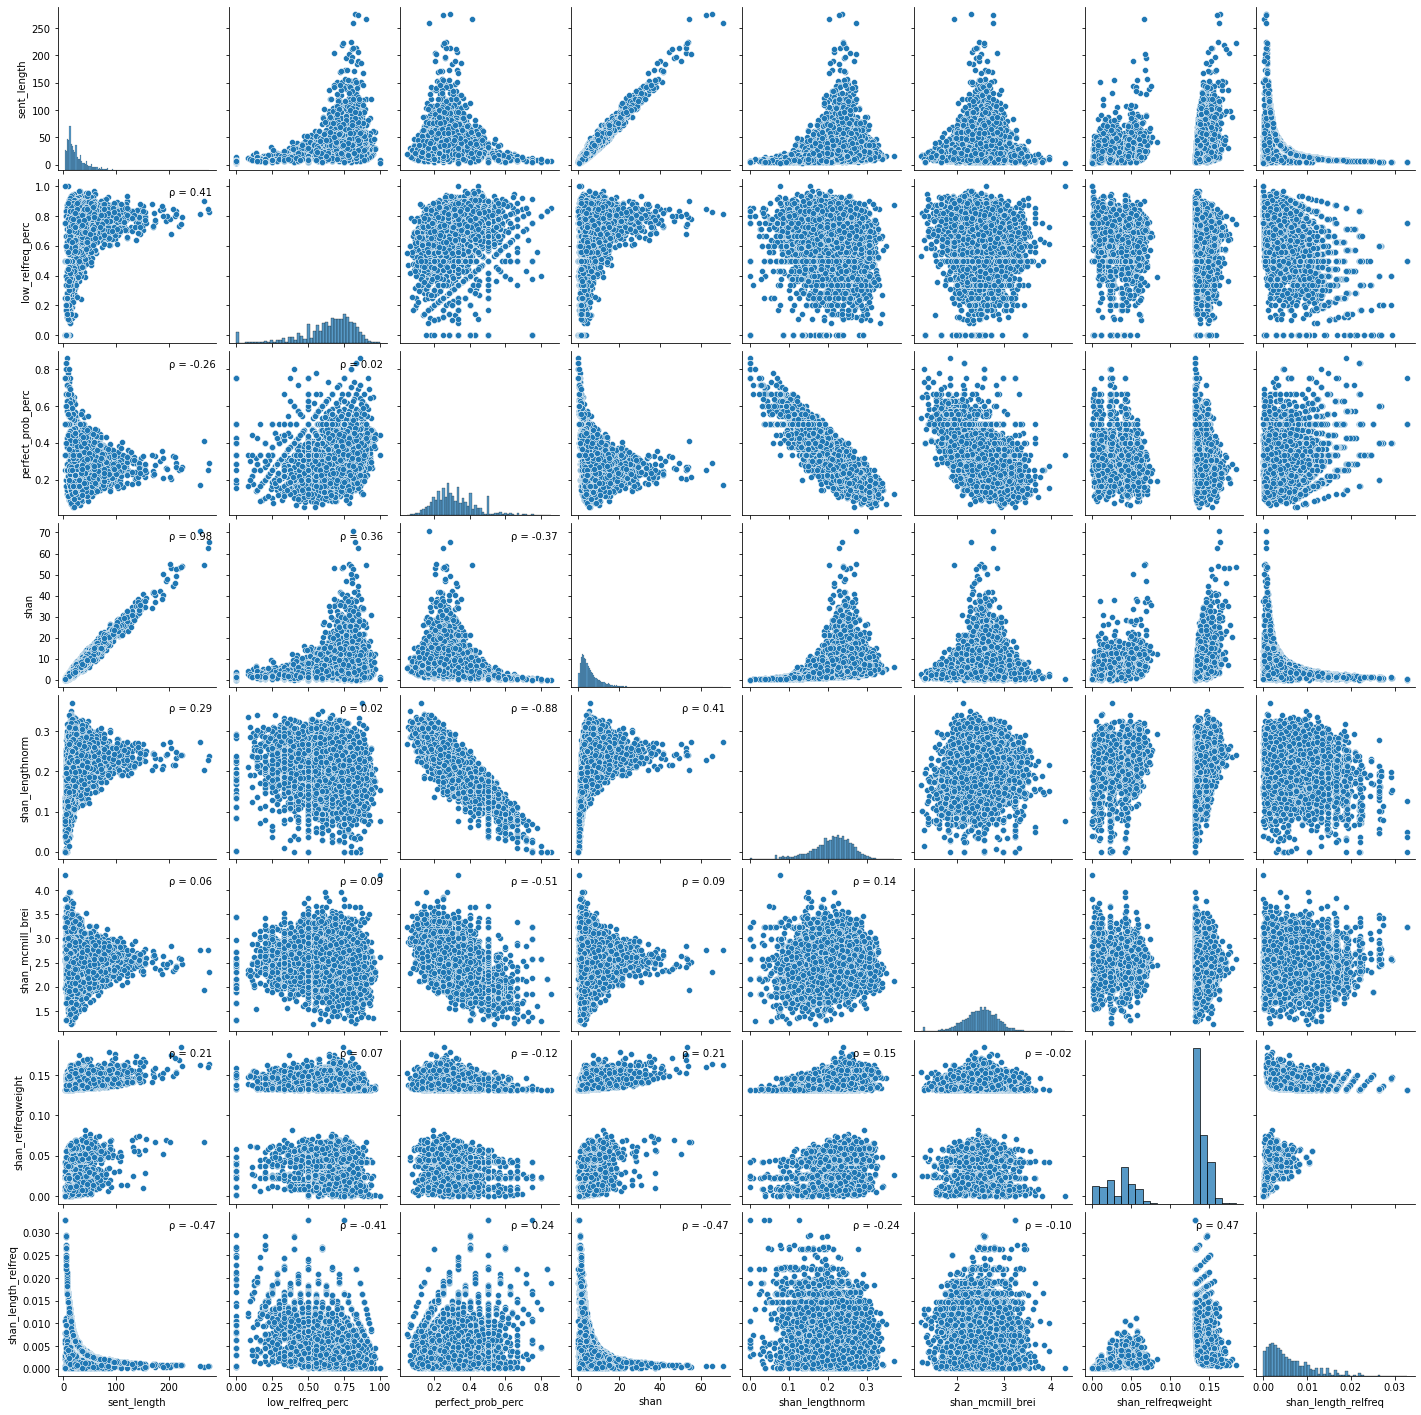

In [9]:
get_corr_pairplot(df)

### Sentences with lowest entropy

For Shannon entropy, length normalised Shannon entropy, and length normalised relative frequency weighted Shannon entropy we'll display the 10 sentences with lowest entropy.

In [10]:
df.sort_values(by=['shan']).head(10)

,text,trigrams,prob_list,sent_length,low_relfreq_perc,perfect_prob_perc,shan,shan_lengthnorm,shan_mcmill_brei,shan_relfreqweight,shan_length_relfreq
1465,heaven forbid !,"[(<s>, <s>, heaven), (<s>, heaven, forbid), (h...","[0.0001295840352468576, 1.0, 1.0, 1.0, 1.0]",5,0.800000,0.800000,0.001673,0.000335,2.582765,0.022836,0.004567
7018,windsor - july .,"[(<s>, <s>, windsor), (<s>, windsor, -), (wind...","[0.0001295840352468576, 1.0, 1.0, 1.0, 1.0, 1.0]",6,0.833333,0.833333,0.001673,0.000279,2.152304,0.131742,0.021957
1133,charade .,"[(<s>, <s>, charade), (<s>, charade, .), (char...","[0.0001295840352468576, 1.0, 1.0, 1.0]",4,0.750000,0.750000,0.001673,0.000418,3.228456,0.131572,0.032893
6657,turning away distressed .,"[(<s>, <s>, turning), (<s>, turning, away), (t...","[0.0001295840352468576, 1.0, 1.0, 1.0, 1.0, 1.0]",6,0.833333,0.833333,0.001673,0.000279,2.152304,0.131742,0.021957
5335,bless me !,"[(<s>, <s>, bless), (<s>, bless, me), (bless, ...","[0.0001295840352468576, 1.0, 1.0, 1.0, 1.0]",5,0.400000,0.800000,0.001673,0.000335,2.582765,0.024145,0.004829
1184,nonsense !,"[(<s>, <s>, nonsense), (<s>, nonsense, !), (no...","[0.0001295840352468576, 1.0, 1.0, 1.0]",4,0.500000,0.750000,0.001673,0.000418,3.228456,0.022968,0.005742
5301,supper was announced .,"[(<s>, <s>, supper), (<s>, supper, was), (supp...","[0.0001295840352468576, 1.0, 1.0, 1.0, 1.0, 1.0]",6,0.833333,0.833333,0.001673,0.000279,2.152304,0.131964,0.021994
2419,"bates ?""","[(<s>, <s>, bates), (<s>, bates, ?""), (bates, ...","[0.0001295840352468576, 1.0, 1.0, 1.0]",4,0.750000,0.750000,0.001673,0.000418,3.228456,0.011354,0.002839
3468,surprizes are foolish things .,"[(<s>, <s>, surprizes), (<s>, surprizes, are),...","[0.0001295840352468576, 1.0, 1.0, 1.0, 1.0, 1....",7,0.857143,0.857143,0.001673,0.000239,1.844832,0.131902,0.018843
4528,heavens !,"[(<s>, <s>, heavens), (<s>, heavens, !), (heav...","[0.0001295840352468576, 1.0, 1.0, 1.0]",4,0.750000,0.750000,0.001673,0.000418,3.228456,0.022751,0.005688


In [11]:
df.sort_values(by=['shan_lengthnorm']).head(10)

,text,trigrams,prob_list,sent_length,low_relfreq_perc,perfect_prob_perc,shan,shan_lengthnorm,shan_mcmill_brei,shan_relfreqweight,shan_length_relfreq
3468,surprizes are foolish things .,"[(<s>, <s>, surprizes), (<s>, surprizes, are),...","[0.0001295840352468576, 1.0, 1.0, 1.0, 1.0, 1....",7,0.857143,0.857143,0.001673,0.000239,1.844832,0.131902,0.018843
7018,windsor - july .,"[(<s>, <s>, windsor), (<s>, windsor, -), (wind...","[0.0001295840352468576, 1.0, 1.0, 1.0, 1.0, 1.0]",6,0.833333,0.833333,0.001673,0.000279,2.152304,0.131742,0.021957
5301,supper was announced .,"[(<s>, <s>, supper), (<s>, supper, was), (supp...","[0.0001295840352468576, 1.0, 1.0, 1.0, 1.0, 1.0]",6,0.833333,0.833333,0.001673,0.000279,2.152304,0.131964,0.021994
6657,turning away distressed .,"[(<s>, <s>, turning), (<s>, turning, away), (t...","[0.0001295840352468576, 1.0, 1.0, 1.0, 1.0, 1.0]",6,0.833333,0.833333,0.001673,0.000279,2.152304,0.131742,0.021957
5335,bless me !,"[(<s>, <s>, bless), (<s>, bless, me), (bless, ...","[0.0001295840352468576, 1.0, 1.0, 1.0, 1.0]",5,0.400000,0.800000,0.001673,0.000335,2.582765,0.024145,0.004829
4420,absolutely insufferable !,"[(<s>, <s>, absolutely), (<s>, absolutely, ins...","[0.0001295840352468576, 1.0, 1.0, 1.0, 1.0]",5,0.800000,0.800000,0.001673,0.000335,2.582765,0.022836,0.004567
1465,heaven forbid !,"[(<s>, <s>, heaven), (<s>, heaven, forbid), (h...","[0.0001295840352468576, 1.0, 1.0, 1.0, 1.0]",5,0.800000,0.800000,0.001673,0.000335,2.582765,0.022836,0.004567
1184,nonsense !,"[(<s>, <s>, nonsense), (<s>, nonsense, !), (no...","[0.0001295840352468576, 1.0, 1.0, 1.0]",4,0.500000,0.750000,0.001673,0.000418,3.228456,0.022968,0.005742
2419,"bates ?""","[(<s>, <s>, bates), (<s>, bates, ?""), (bates, ...","[0.0001295840352468576, 1.0, 1.0, 1.0]",4,0.750000,0.750000,0.001673,0.000418,3.228456,0.011354,0.002839
1133,charade .,"[(<s>, <s>, charade), (<s>, charade, .), (char...","[0.0001295840352468576, 1.0, 1.0, 1.0]",4,0.750000,0.750000,0.001673,0.000418,3.228456,0.131572,0.032893


In [12]:
df.sort_values(by=['shan_length_relfreq']).head(10)

,text,trigrams,prob_list,sent_length,low_relfreq_perc,perfect_prob_perc,shan,shan_lengthnorm,shan_mcmill_brei,shan_relfreqweight,shan_length_relfreq
7017,weston .],"[(<s>, <s>, weston), (<s>, weston, .]), (westo...","[0.0018141764934560061, 0.07142857142857142, 0...",4,0.750000,0.250000,0.752860,0.188215,3.808938,0.000114,0.000029
7716,finis,"[(<s>, <s>, finis), (<s>, finis, </s>), (finis...","[0.0027212647401840093, 0.047619047619047616, ...",3,1.000000,0.333333,0.232347,0.077449,4.304608,0.000090,0.000030
1113,"my first doth affliction denote , which my sec...","[(<s>, <s>, my), (<s>, my, first), (my, first,...","[0.008682130361539458, 0.04477611940298507, 0....",31,0.967742,0.419355,4.961692,0.160055,2.330189,0.001453,0.000047
0,[ emma by jane austen 1816 ],"[(<s>, <s>, [), (<s>, [, emma), ([, emma, by),...","[0.0002591680704937152, 0.5, 1.0, 1.0, 0.5, 1....",9,1.000000,0.444444,1.388072,0.154230,2.616273,0.000440,0.000049
3412,how would he bear to have miss bates belonging...,"[(<s>, <s>, how), (<s>, how, would), (how, wou...","[0.007775042114811455, 0.016666666666666666, 1...",53,0.886792,0.226415,13.428443,0.253367,2.726966,0.002643,0.000050
7686,chapter xix,"[(<s>, <s>, chapter), (<s>, chapter, xix), (ch...","[0.0071271219385771675, 0.01818181818181818, 1...",4,0.750000,0.500000,0.155950,0.038987,3.228456,0.000208,0.000052
1228,only think of those sweet verses --` to miss -...,"[(<s>, <s>, only), (<s>, only, think), (only, ...","[0.0010366722819748608, 0.25, 0.5, 0.028571428...",12,0.916667,0.416667,1.921029,0.160086,2.537088,0.000624,0.000052
265,such another small basin of thin gruel as his ...,"[(<s>, <s>, such), (<s>, such, another), (such...","[0.0038875210574057274, 0.06666666666666667, 0...",45,0.844444,0.288889,10.262789,0.228062,2.508461,0.002341,0.000052
6072,an abominable puppy !-- you know who i mean ( ...,"[(<s>, <s>, an), (<s>, an, abominable), (an, a...","[0.0011662563172217184, 0.1111111111111111, 1....",17,0.882353,0.411765,2.728059,0.160474,2.476147,0.000957,0.000056
632,"how completely it meant , ` why should my pict...","[(<s>, <s>, how), (<s>, how, completely), (how...","[0.007775042114811455, 0.016666666666666666, 1...",15,0.933333,0.533333,2.149757,0.143317,1.793169,0.000893,0.000060


If you want to look up the frequency specifics of a certain sentence, you can use `get_freq_counts` to get frequency counts for the tri- and unigrams.

In [13]:
get_freq_counts(df, lm, fdist, 420)

Trigram counts:
<s> <s> compare (2)
<s> compare mr (1)
compare mr . (2)
mr . martin (37)
. martin with (2)
martin with either (1)
with either of (3)
either of _them_ (1)
of _them_ . (1)
_them_ . </s> (1)
. </s> </s> (5110)

Unigram counts:
<s> (15434)
<s> (15434)
compare (6)
mr (1153)
. (6928)
martin (85)
with (1217)
either (64)
of (4291)
_them_ (4)
. (6928)
</s> (15434)
</s> (15434)


Finally, we'll visualise the difference between Shannon entropy and length normalised relative frequency weighted Shannon entropy in terms of their correlation.

(-0.46588603106898024, 0.0)


Text(0, 0.5, 'Shannon entropy')

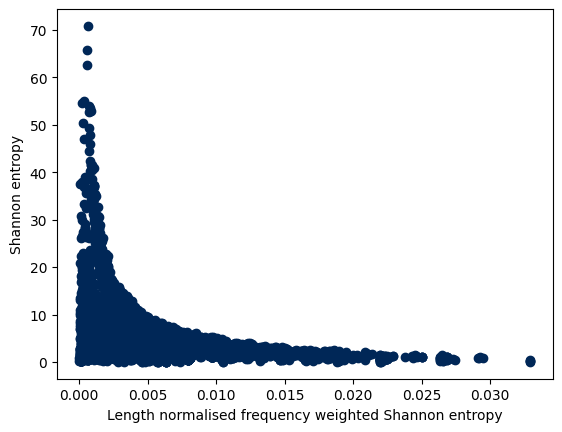

In [14]:
print(stats.pearsonr(df['shan_length_relfreq'], df['shan']))
plt.scatter(df['shan_length_relfreq'], df['shan'], color='#002757')
plt.xlabel("Length normalised frequency weighted Shannon entropy")
plt.ylabel("Shannon entropy")